### Import the necessary libraries here:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### Load the Dataset

In [ ]:
data = pd.read_csv(r'/content/loan.csv')

In [ ]:
data.head() # Printing first 5 records

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(39717, 111)

##### Dataset has shape of (39,717 rows, 111 columns)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Info of the dataset.

In [ ]:
# Data type

data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [ ]:
data.columns # columns present in the loaded dataset

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Data cleaning

In [ ]:
data.isna().sum() # Checking null values

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

There are lot of null values in the columns and some columns are completely filled with the NAN Values

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values and their counts
print("\nColumns with Missing Values:")
print(missing_values[missing_values > 0])


Columns with Missing Values:
emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64


Boom!, Fetched the data with null values, let's treat the null values..

In [ ]:
# Handle missing values by dropping columns with a high percentage of missing values
threshold = 0.5

# Identify columns with missing values exceeding the threshold
columns_to_drop = missing_values[missing_values / len(data) > threshold].index

# Drop the identified columns from the dataset
data_cleaned = data.drop(columns=columns_to_drop)

# Display the remaining columns and their data types
print("\nRemaining Columns and Data Types:")
print(data_cleaned.isnull().sum())



Remaining Columns and Data Types:
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line             

According to the threshold set, we removed the null values but still showing in some columns.

Let's treat the null values according to the columns importance and better analysis--

In [ ]:
data_cleaned['emp_title'].fillna('Unknown', inplace=True)
data_cleaned['emp_length'].fillna(0, inplace=True)

In [ ]:
data_cleaned.drop(['desc', 'title'], axis=1, inplace=True) # Not giving any better insights

In [ ]:
# Convert 'revol_util' column to numeric values (remove the '%' symbol)
data_cleaned['revol_util'] = pd.to_numeric(data_cleaned['revol_util'].str.rstrip('%'), errors='coerce')

# Now you can fill missing values with the median
data_cleaned['revol_util'].fillna(data_cleaned['revol_util'].median(), inplace=True)


Removed the % symbol from the dataset and removed nan values with the median for better analysis.

In [ ]:
data_cleaned['collections_12_mths_ex_med'].fillna(0, inplace=True) # Filled null values with 0
data_cleaned['chargeoff_within_12_mths'].fillna(0, inplace=True)

In [ ]:
data_cleaned.dropna(subset=['last_pymnt_d', 'last_credit_pull_d'], inplace=True) # Not required according to the Buisness requirements

In [ ]:
data_cleaned['pub_rec_bankruptcies'].fillna(data_cleaned['pub_rec_bankruptcies'].mode()[0], inplace=True)
 # removed the missing values with the mode so that we can include the more occured value in that column.

In [ ]:
data_cleaned.dropna(subset=['pub_rec', 'tax_liens'], inplace=True)

In [ ]:
# Check if there are any remaining missing values
remaining_missing = data_cleaned.isnull().sum()
print("\nRemaining Missing Values:")
print(remaining_missing[remaining_missing > 0])


Remaining Missing Values:
Series([], dtype: int64)


Null values treated.

In [ ]:
data_cleaned # Inspect the data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39679,113156,113146,3500,3500,3500.0,36 months,8.07%,109.79,A,A4,...,110.07,Jul-10,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
39680,112496,112493,3000,3000,525.0,36 months,11.86%,99.44,D,D1,...,101.51,Jul-10,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0
39681,112323,107671,3500,3500,1125.0,36 months,10.28%,113.39,C,C1,...,6.57,Aug-10,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
39683,112245,112227,5000,5000,3975.0,36 months,7.43%,155.38,A,A2,...,158.65,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [ ]:
data_cleaned.columns # Check the unnecessary columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

'emp_title' and 'emp_length': We have already filled missing values in 'emp_title' with 'Unknown'.

In [ ]:
# Drop unnecessary columns
columns_to_drop = ['id', 'member_id', 'url', 'policy_code','tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths','acc_now_delinq','collections_12_mths_ex_med']
data_cleaned = data_cleaned.drop(columns=columns_to_drop)

These columns seem to be unique identifiers and may not contribute much to the analysis. It's common to drop such columns.

In [ ]:
data_cleaned['issue_d'] = pd.to_datetime(data_cleaned['issue_d'], errors='coerce')
data_cleaned['earliest_cr_line'] = pd.to_datetime(data_cleaned['earliest_cr_line'], errors='coerce')

This column represents the month in which the loan was funded. Depending on our analysis goals, we can extract relevant information (e.g., year, quarter) or use it as it is.

In [ ]:
# Display remaining columns and their data types
print("\nRemaining Columns and Data Types:")
print(data_cleaned.shape)


Remaining Columns and Data Types:
(39605, 43)


In [ ]:
data_cleaned.head() # Cleaned data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,Unknown,10+ years,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,Unknown,10+ years,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,INDIVIDUAL,0.0


In [ ]:
data_cleaned.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'application_type', 'pub_rec_bankruptcies'],
      dtype='object')

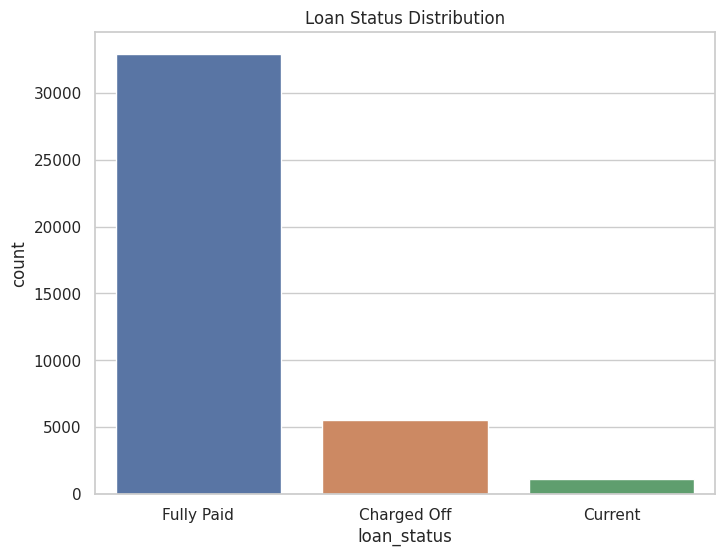

In [ ]:
sns.set(style="whitegrid")
# Loan Status Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=data_cleaned)
plt.title('Loan Status Distribution')
plt.show()

The bar plot illustrates the distribution of loan statuses. The majority are labeled as "Fully Paid," indicating successful loan repayments. A notable portion is marked as "Charged Off," signifying defaults. Understanding this distribution is crucial for assessing the portfolio's overall risk and performance.

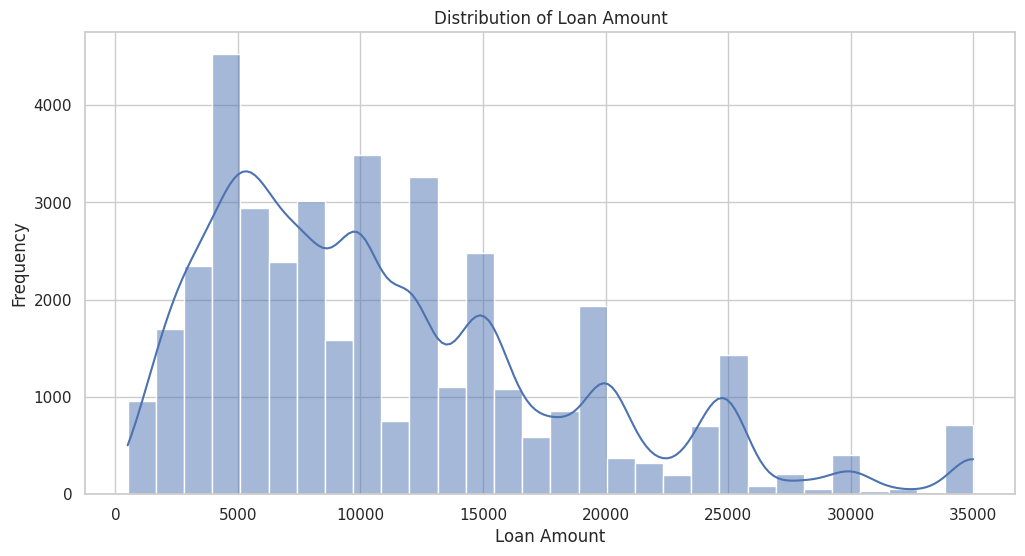

In [ ]:
# Loan Amount Distribution

plt.figure(figsize=(12, 6))
sns.histplot(x='loan_amnt', bins=30, kde=True, data=data_cleaned)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

Insights -

The histogram tells about the distribution of loan amounts. Most loans fall within a specific range, indicating a common loan size preference. Understanding this distribution aids in identifying trends and patterns, facilitating better decision-making in loan management.

In [2]:
# Correlation Matrix (for numeric columns)

numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_cleaned[numeric_columns].corr()

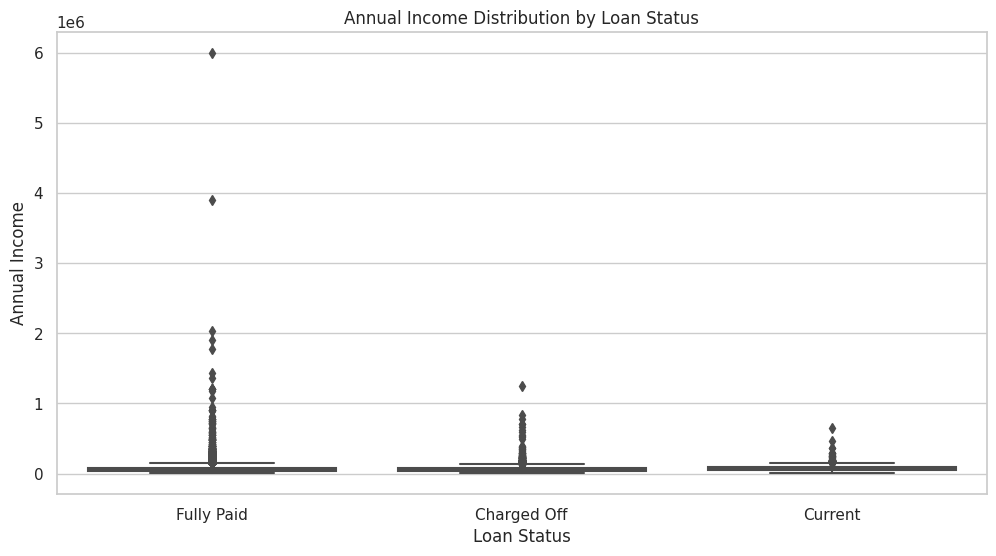

In [ ]:
# Boxplot of Annual Income by Loan Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=data_cleaned)
plt.title('Annual Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.show()

These visualizations cover the distribution of loan status, loan amount, correlation among numeric features, and the relationship between annual income and loan status.

In [ ]:
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

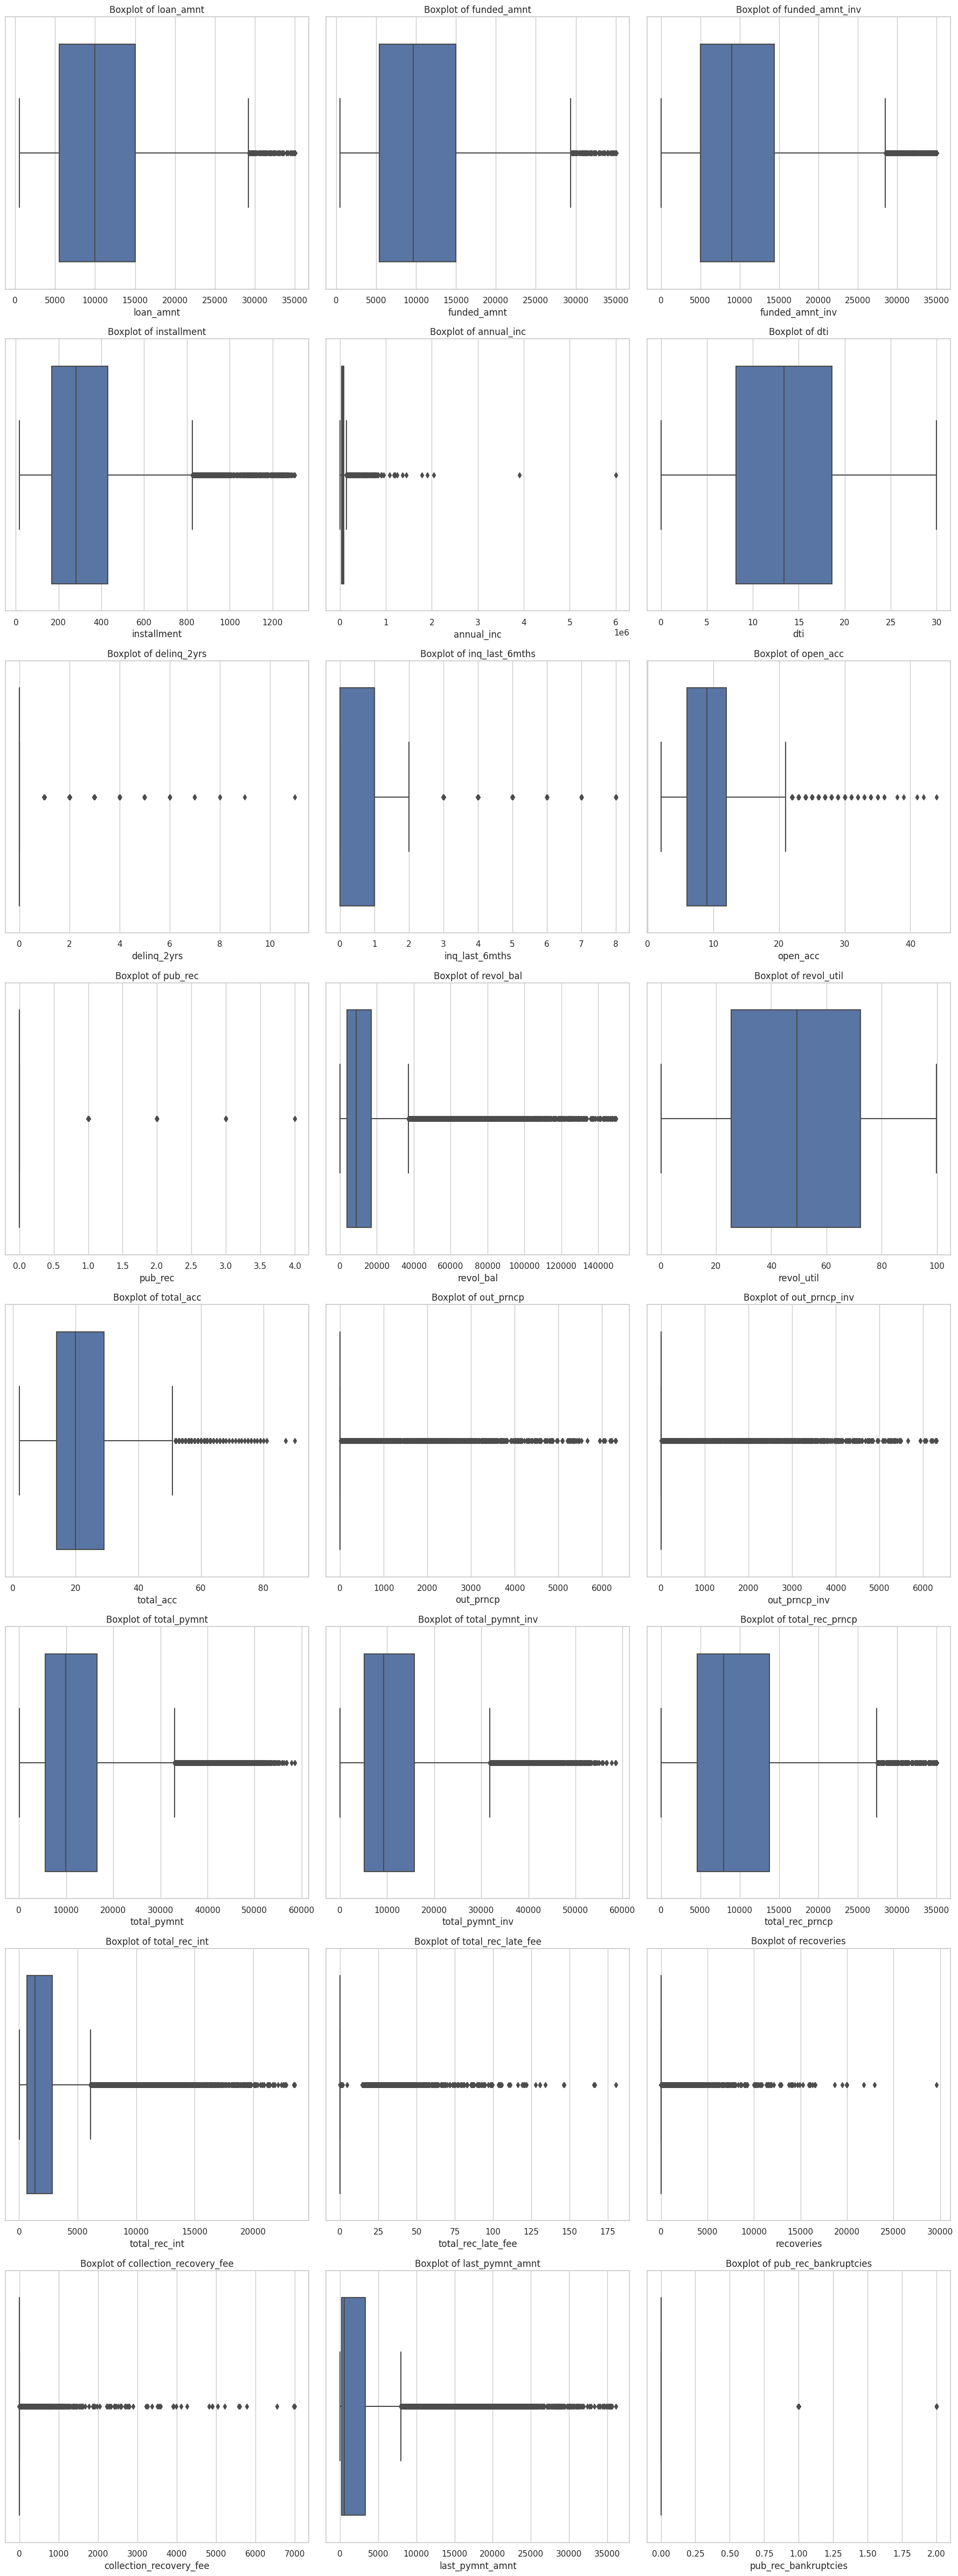

In [ ]:
# Identify and Handle Outliers

# Define the number of columns to display in each row
columns_per_row = 3

# Calculate the total number of rows needed
total_rows = (len(numeric_columns) + columns_per_row - 1) // columns_per_row

# Create subplots dynamically based on the number of numeric columns
plt.figure(figsize=(18, total_rows * 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(total_rows, columns_per_row, i)
    sns.boxplot(x=data_cleaned[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


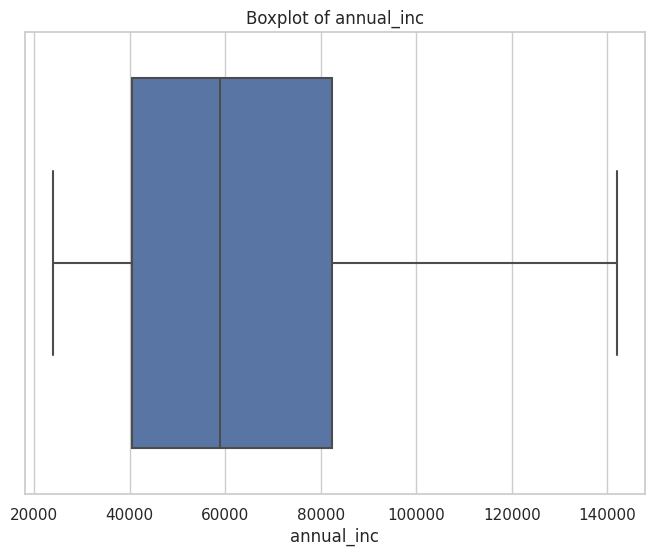

In [ ]:
from scipy.stats.mstats import winsorize

# Choose a numeric column to apply winsorization (e.g., 'annual_inc')
column_to_winsorize = 'annual_inc'

# Apply winsorization to the chosen column
data_cleaned[column_to_winsorize] = winsorize(data_cleaned[column_to_winsorize], limits=[0.05, 0.05])

# Visualize the boxplot after winsorization
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_cleaned[column_to_winsorize])
plt.title(f'Boxplot of {column_to_winsorize}')
plt.xlabel(column_to_winsorize)
plt.show()


Interpretation --

Winsorization is applied to 'annual_inc' to analyse the impact of extreme values, enhancing the boxplot's interpretability. This process ensures a more accurate representation of the distribution, aiding in robust statistical analysis and modeling.

In [4]:
# Check unique values in 'loan_status' column
print(data_cleaned['loan_status'].value_counts())


Loan status with value as 'Current' does not give us the insights that the loan will be default or not, so we this will be excluded from initial analysis.

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39605 entries, 0 to 39684
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                39605 non-null  int64         
 1   funded_amnt              39605 non-null  int64         
 2   funded_amnt_inv          39605 non-null  float64       
 3   term                     39605 non-null  object        
 4   int_rate                 39605 non-null  object        
 5   installment              39605 non-null  float64       
 6   grade                    39605 non-null  object        
 7   sub_grade                39605 non-null  object        
 8   emp_title                39605 non-null  object        
 9   emp_length               39605 non-null  object        
 10  home_ownership           39605 non-null  object        
 11  annual_inc               39605 non-null  float64       
 12  verification_status      39605 n

### Univariate analysis

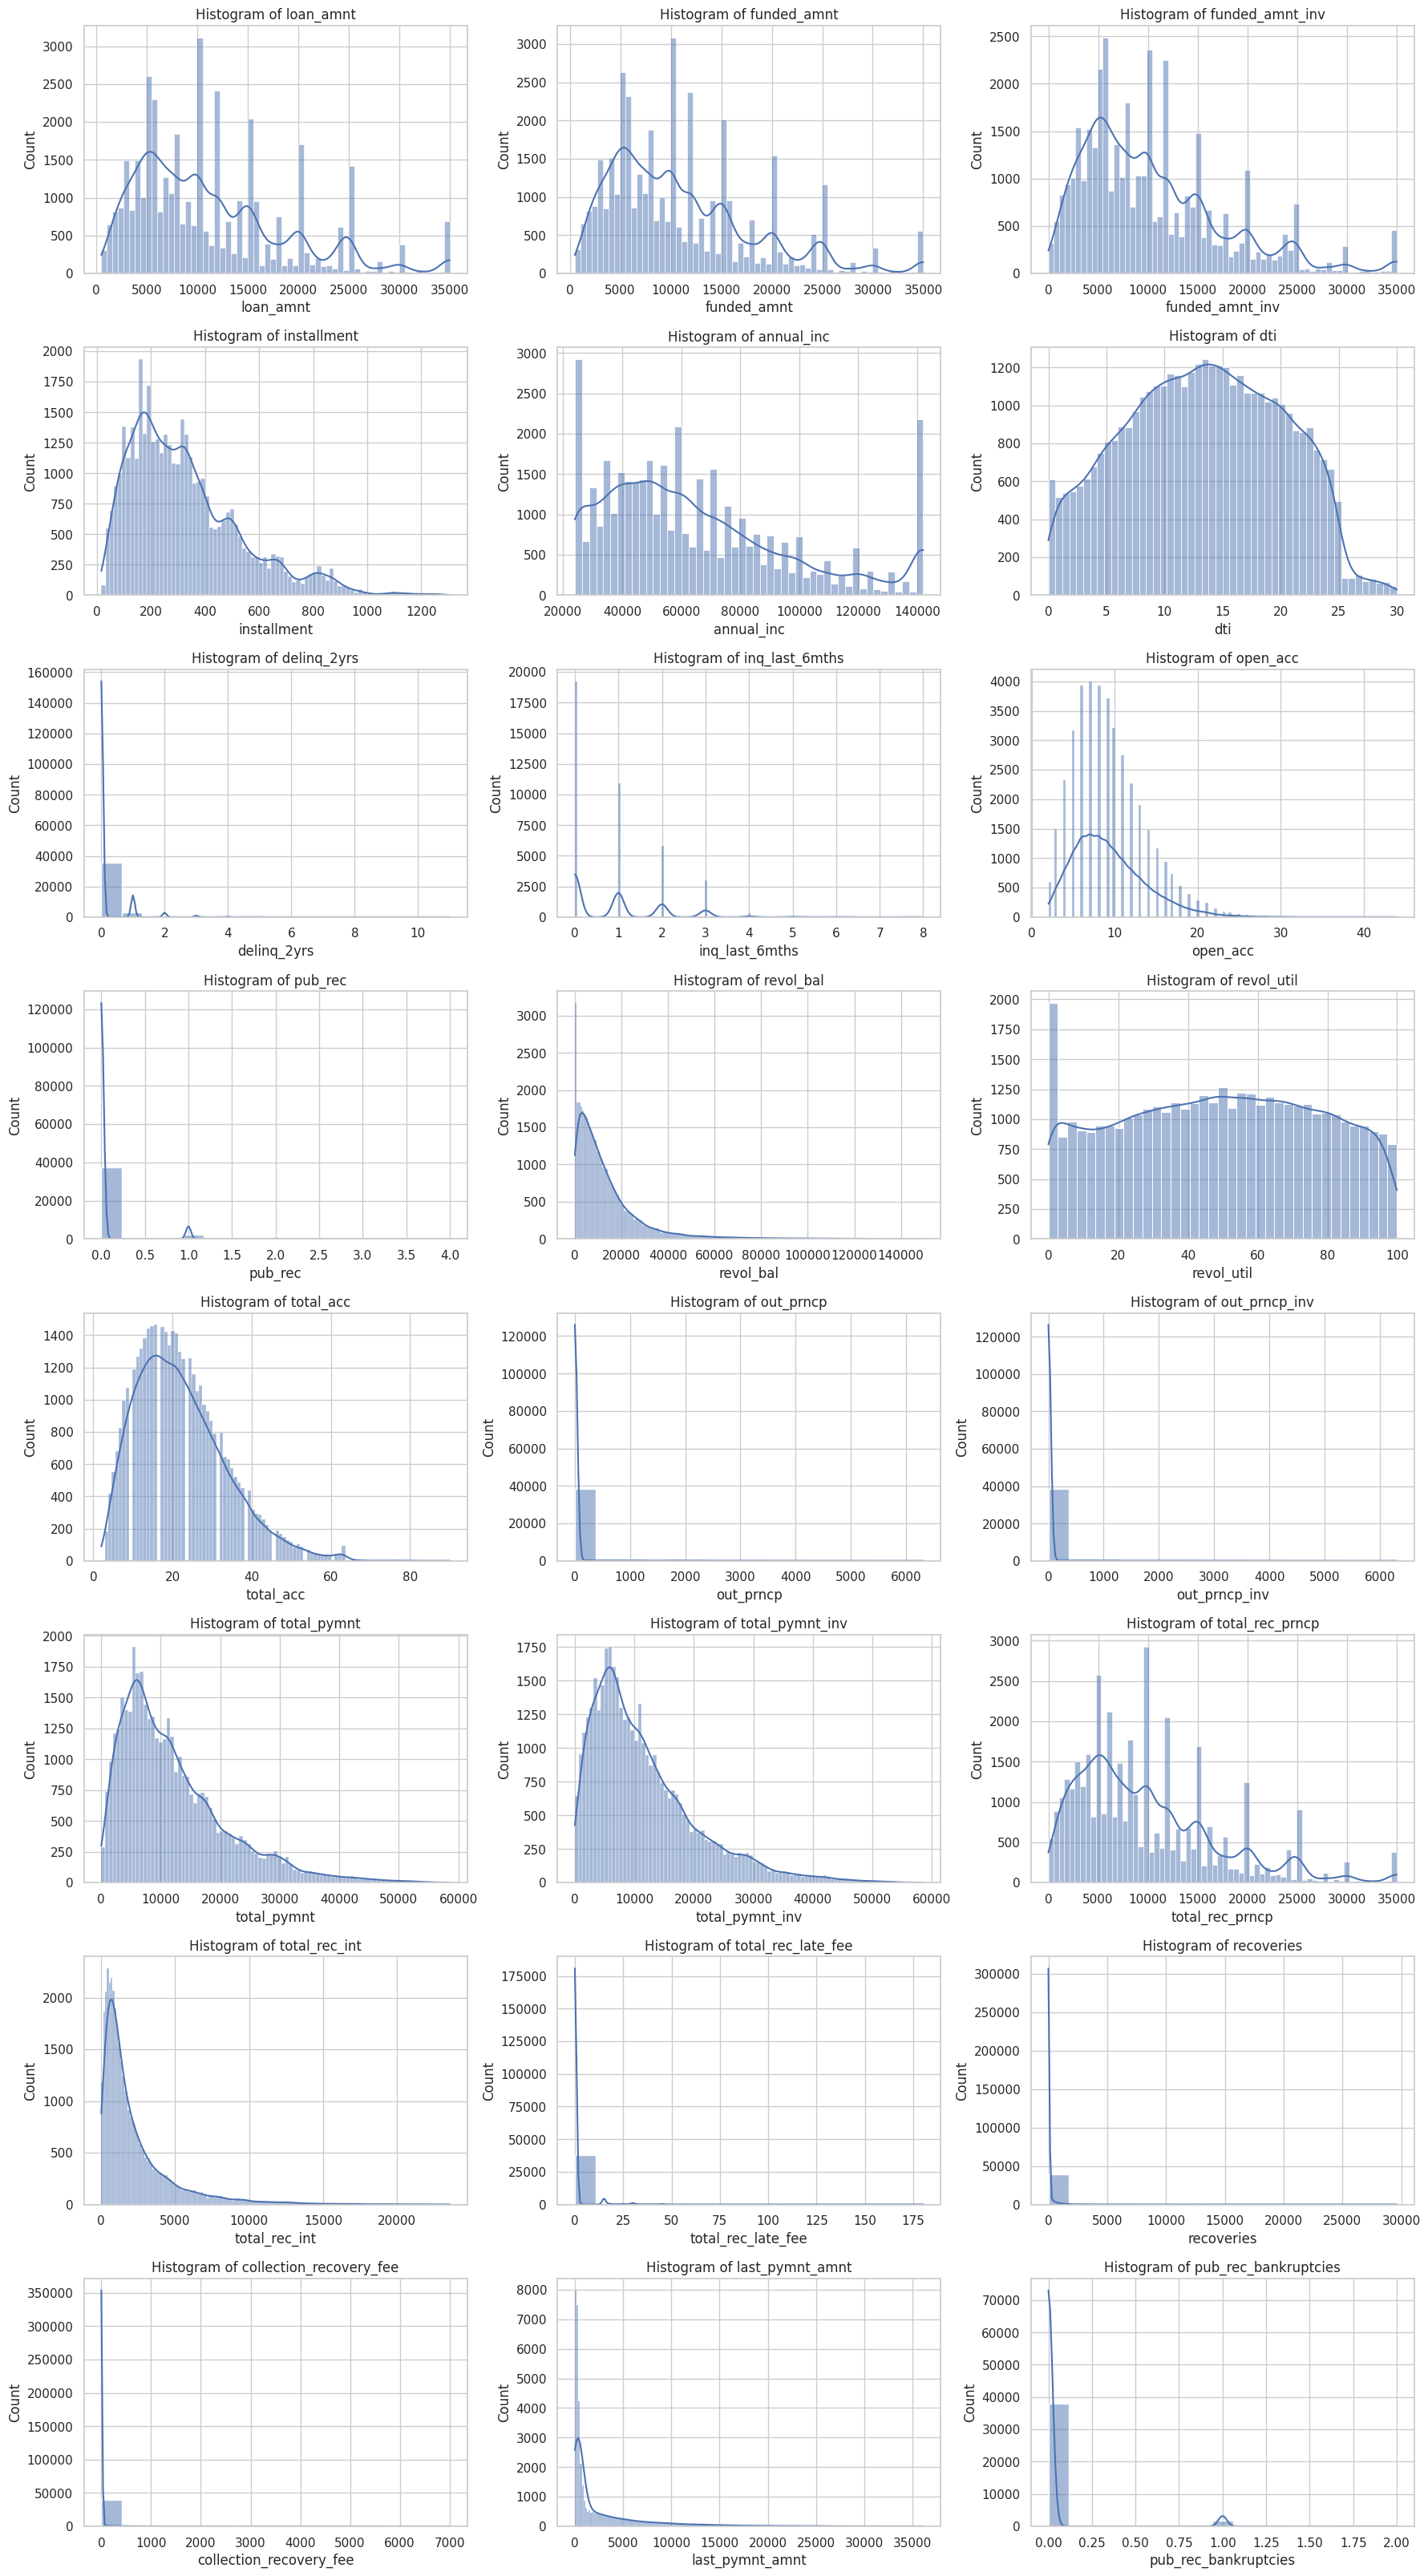

In [ ]:
# Numeric columns for univariate analysis
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of subplots based on the number of numeric columns
num_subplots = len(numeric_columns)

# Plot histograms for numeric variables
plt.figure(figsize=(18, 4 * num_subplots))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_subplots, 3, i)
    sns.histplot(data_cleaned[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


Univariate analysis of numeric columns reveals the distribution characteristics. Each subplot displays the histogram with kernel density estimation, offering insights into the data distribution for various numerical features. This aids in understanding the dataset's overall shape and identifying potential patterns.

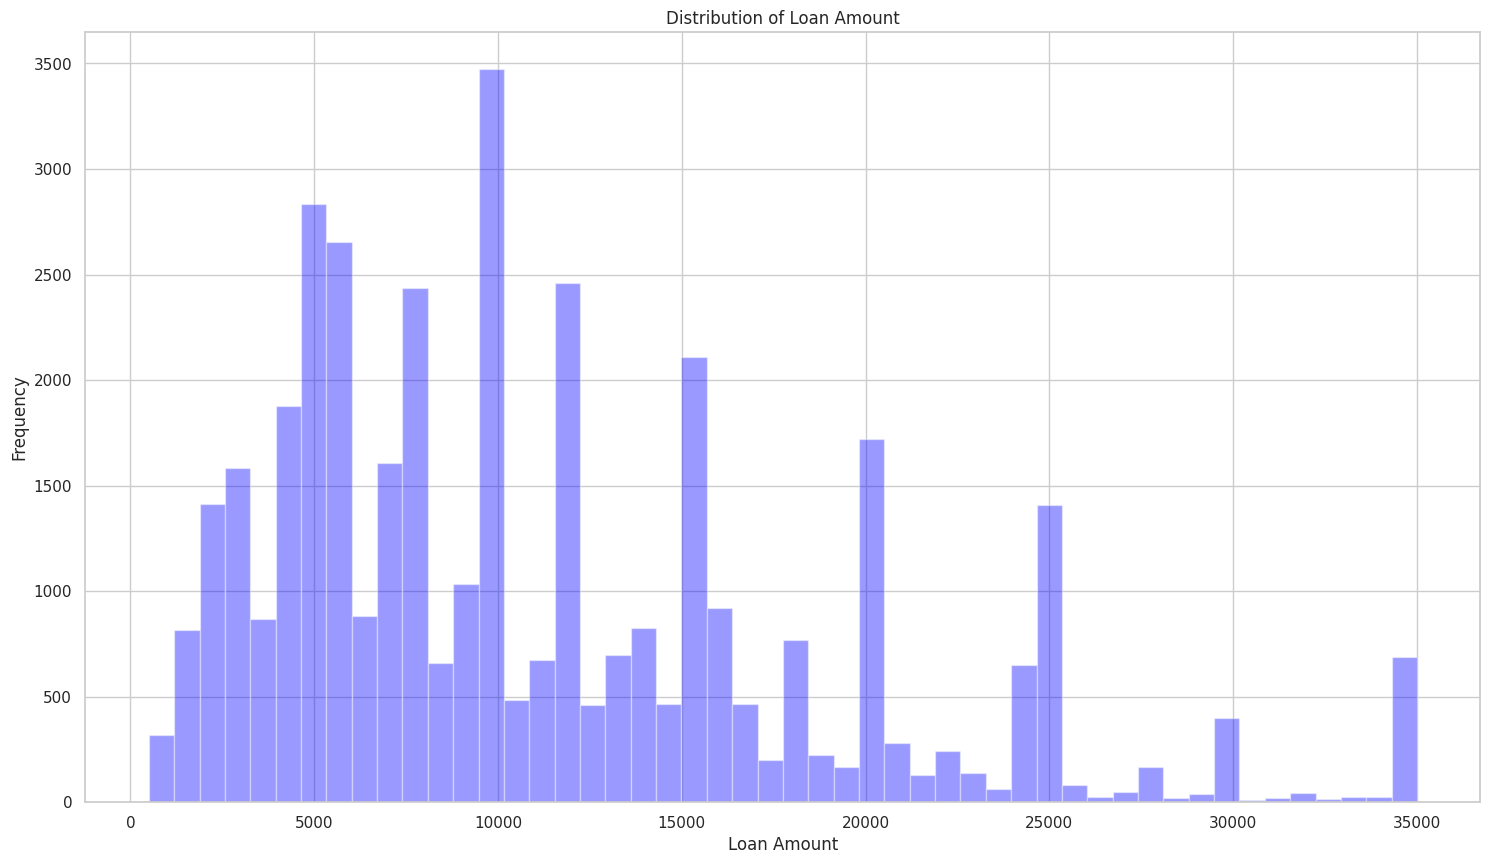

In [ ]:
plt.figure(figsize=(18, 10))
sns.distplot(data_cleaned['loan_amnt'], kde=False, color='blue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


Interpretation:

1. The first subplot shows the distribution of the loan amount requested by borrowers.

2. The x-axis represents the loan amount, and the y-axis represents the frequency or count of loans.

3. The histogram reveals that a significant number of loans fall within a specific range, likely indicating common loan amounts requested by borrowers.

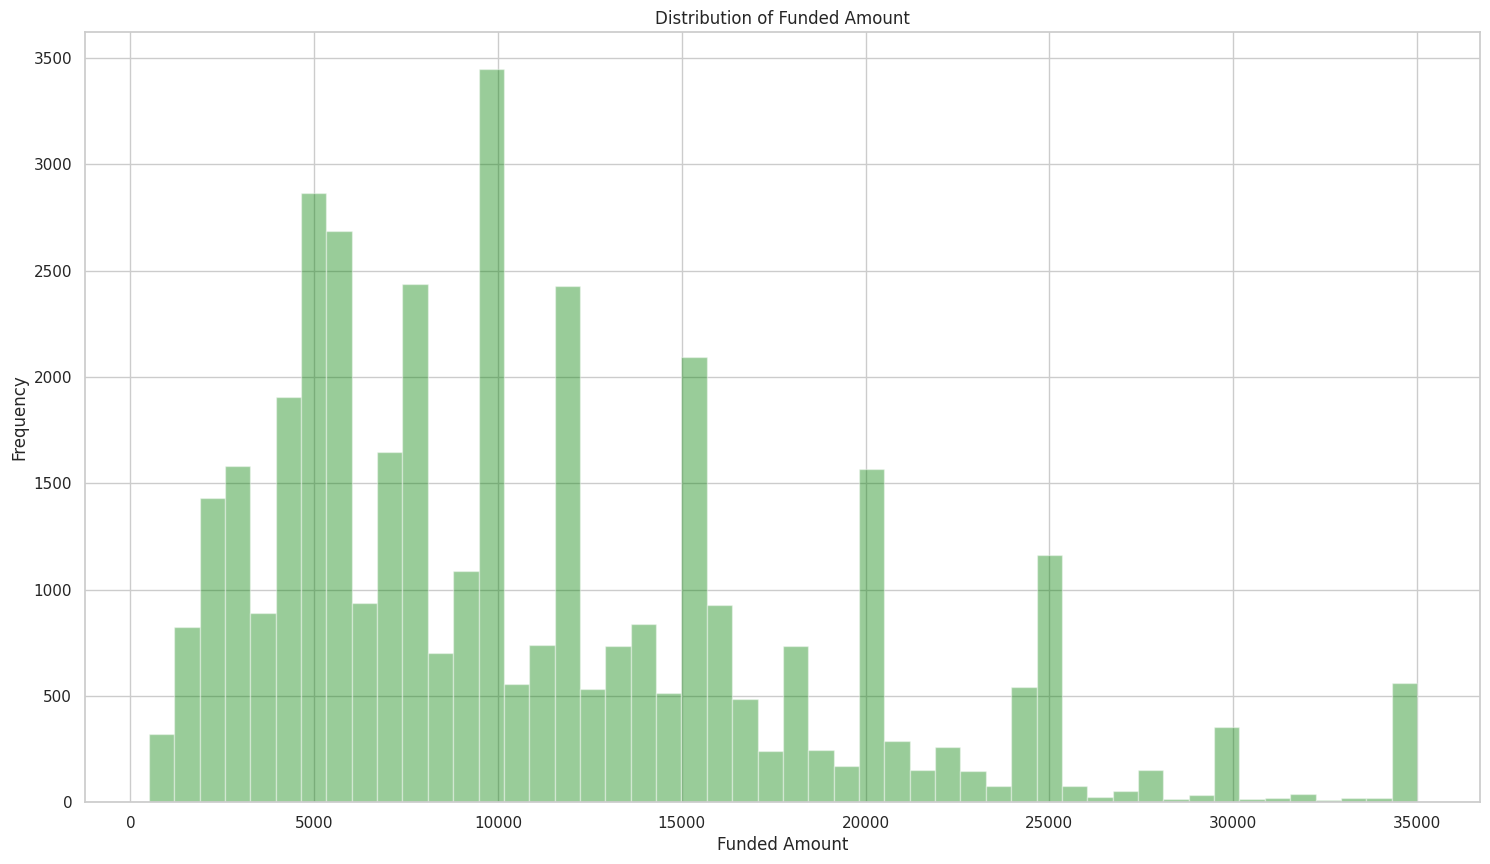

In [ ]:
plt.figure(figsize=(18, 10))
sns.distplot(data_cleaned['funded_amnt'], kde=False, color='green')
plt.title('Distribution of Funded Amount')
plt.xlabel('Funded Amount')
plt.ylabel('Frequency')
plt.show()


Interpretation:

1. Illustrates the distribution of the funded amount, which represents the actual amount provided by the lending platform to borrowers.

2. Similar to the loan amount distribution, it is right-skewed, indicating that a majority of loans are funded at lower amounts.

3. The distribution provides insights into the central tendency and variability in funded amounts.

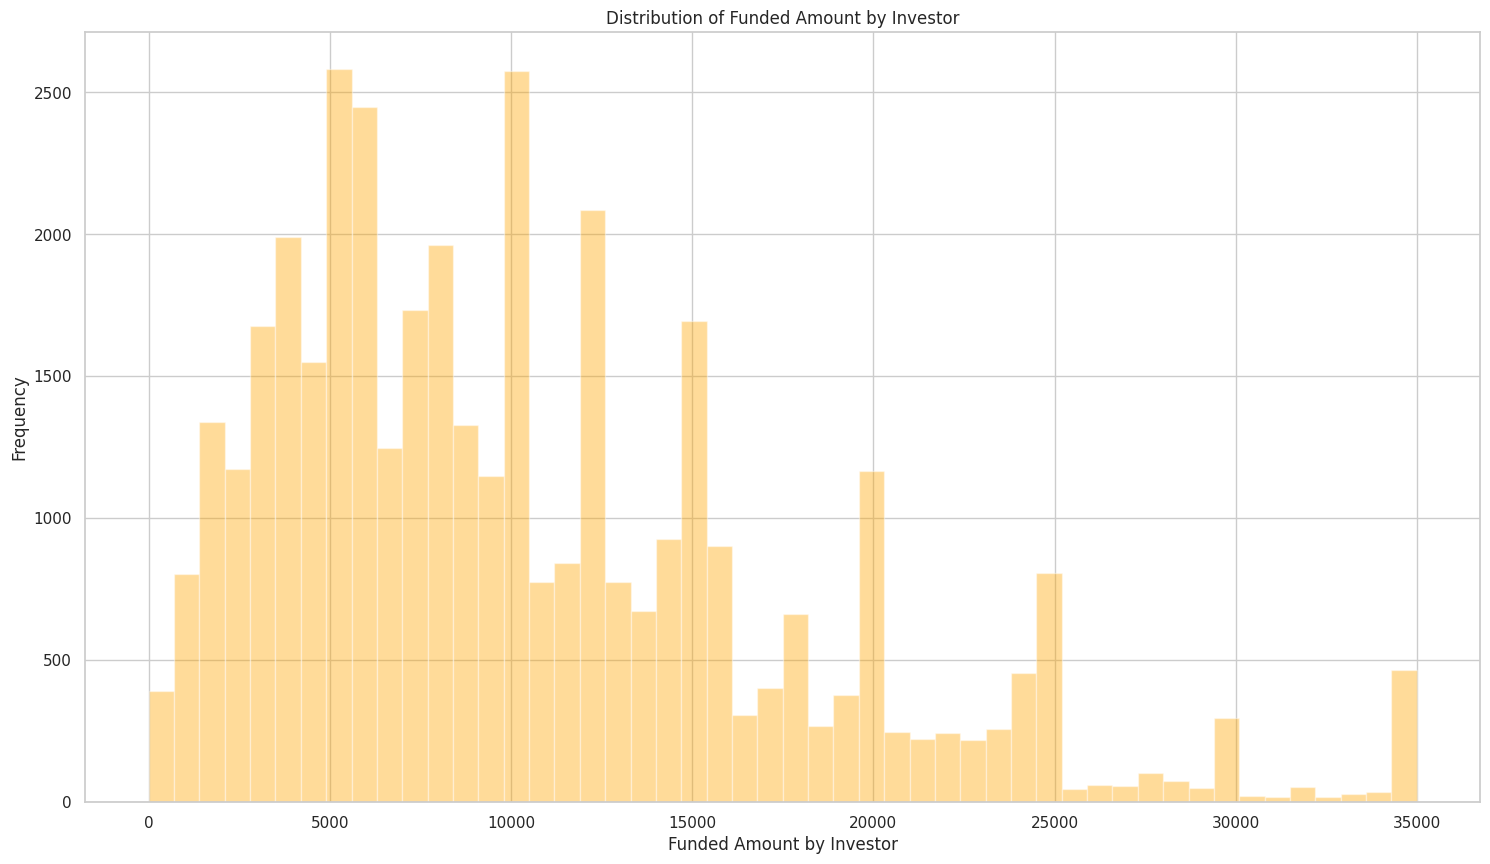

In [ ]:
plt.figure(figsize=(18, 10))
sns.distplot(data_cleaned['funded_amnt_inv'], kde=False, color='orange')
plt.title('Distribution of Funded Amount by Investor')
plt.xlabel('Funded Amount by Investor')
plt.ylabel('Frequency')
plt.show()


Interpretation:

1. Focuses on the distribution of the funded amount by investors, representing the portion of the loan funded by external investors.

2. Similar to the previous distributions, it is right-skewed, suggesting that a majority of loans have a lower amount funded by investors.

3. The variable provides insights into the level of participation by individual investors in funding loans on the platform.

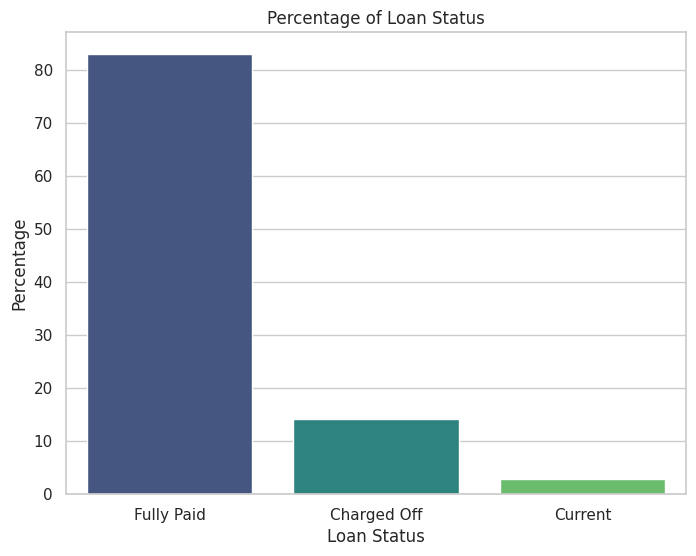

In [ ]:
loan_status_counts = data['loan_status'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette='viridis')
plt.title('Percentage of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
plt.show()

From here we can say that more than 85 percent of the people have fully paid their loan and about 14 percent have charged off

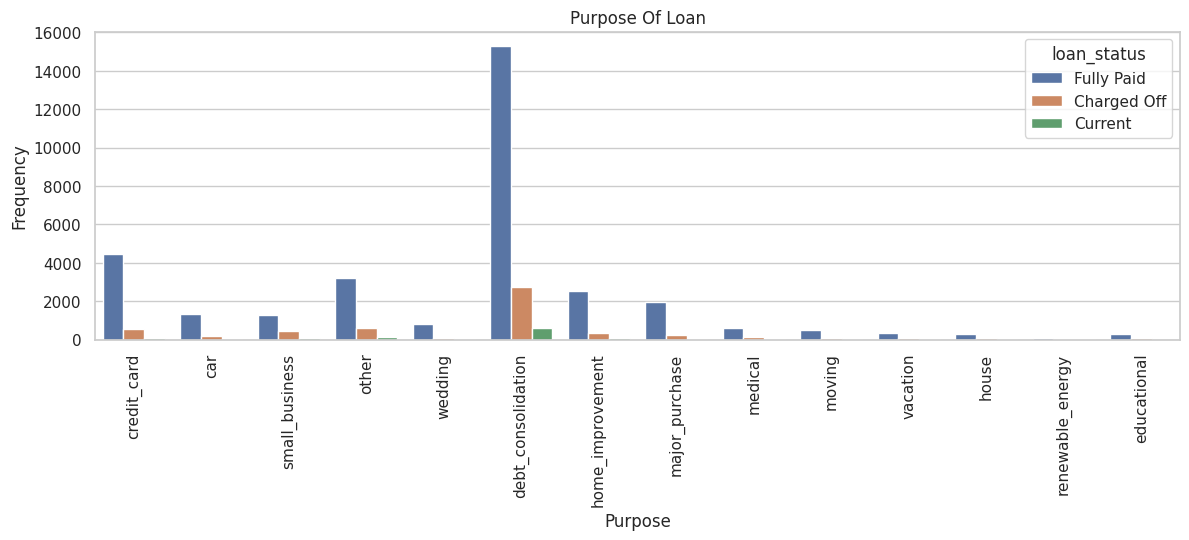

In [ ]:
plt.figure(figsize=(14,4))
ax = sns.countplot(x="purpose", data=data_cleaned, hue= 'loan_status')
ax.set_title('Purpose Of Loan')
ax.set_ylabel('Frequency')
ax.set_xlabel('Purpose')
plt.xticks(rotation=90)
plt.show()

Observations:

1. The plot allows you to compare the distribution of loan purposes for fully paid, charged off, and current loans.

2. You can observe which loan purposes have higher frequencies and how they are distributed across different loan statuses.

3. It helps identify patterns or trends in loan purposes that may be associated with higher or lower default rates.

### Bivariate Analysis

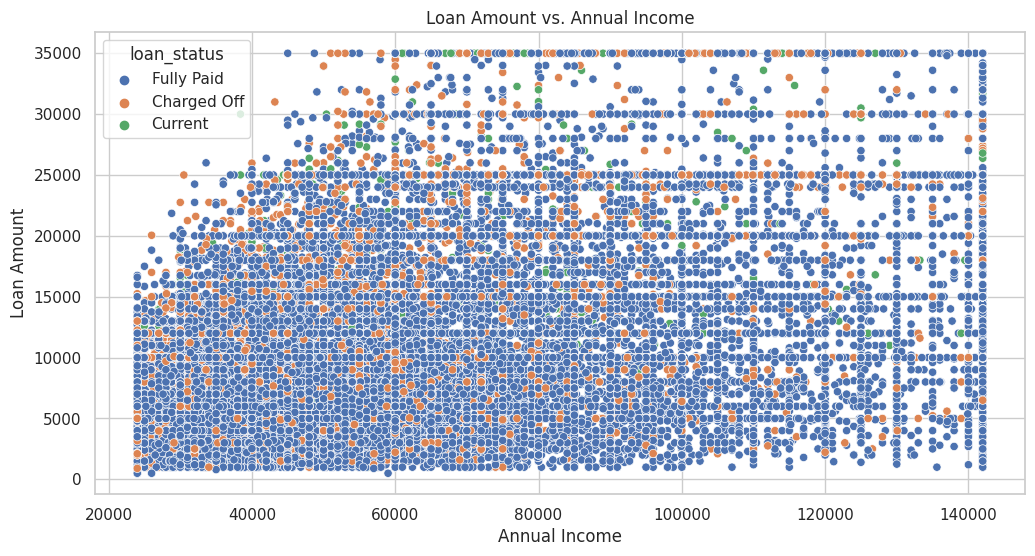

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='annual_inc', y='loan_amnt', data=data_cleaned, hue='loan_status')
plt.title('Loan Amount vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()


Interpretation:

1. This scatter plot explores the relationship between annual income and loan amount.

2. Each point represents a loan application, and the color (hue) indicates the loan status.

3. It helps visualize if there's any correlation between annual income, loan amount, and loan status.

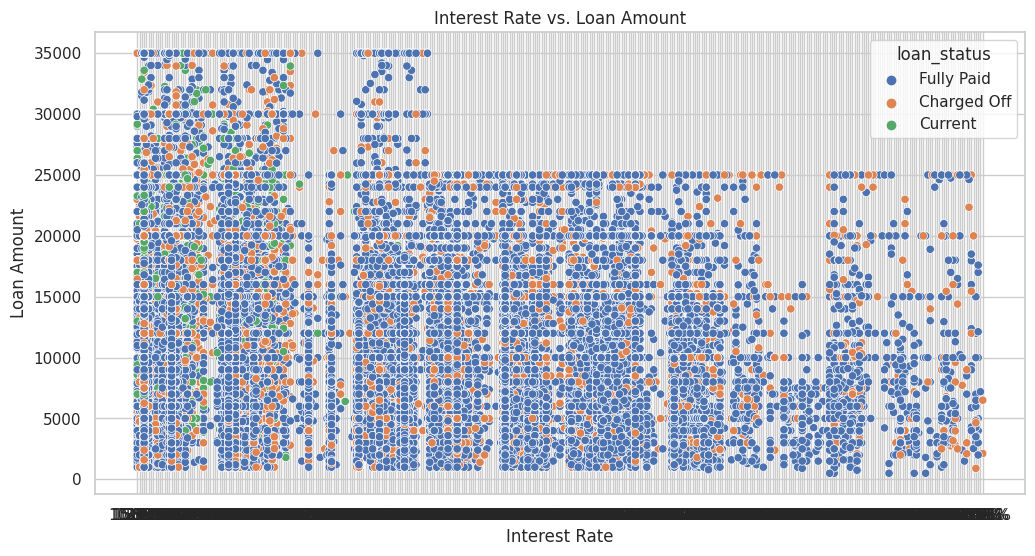

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='int_rate', y='loan_amnt', data=data_cleaned, hue='loan_status')
plt.title('Interest Rate vs. Loan Amount')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount')
plt.show()


Interpretation:

1. This scatter plot examines the relationship between interest rate and loan amount.

2. Each point represents a loan, and the color indicates the loan status.

3. It helps identify if higher loan amounts are associated with specific interest rates and how it relates to loan status.

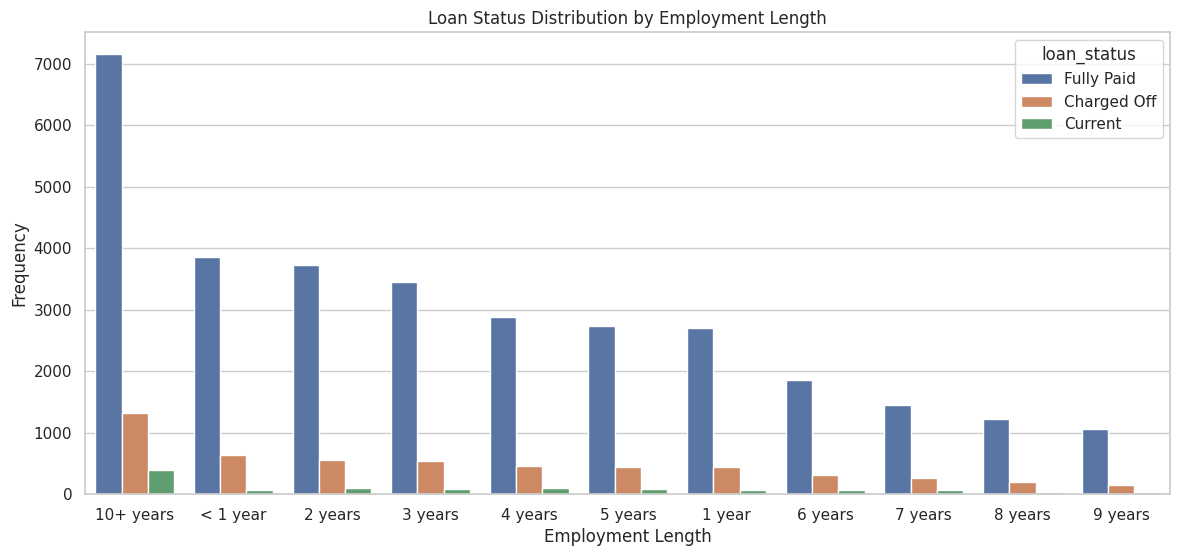

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(x='emp_length', data=data_cleaned, hue='loan_status', order=data['emp_length'].value_counts().index)
plt.title('Loan Status Distribution by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Frequency')
plt.show()


Interpretation:

1. This count plot shows the distribution of loan statuses based on employment length.

2. It helps understand how the length of employment relates to the likelihood of fully paid, charged off, or current loans.

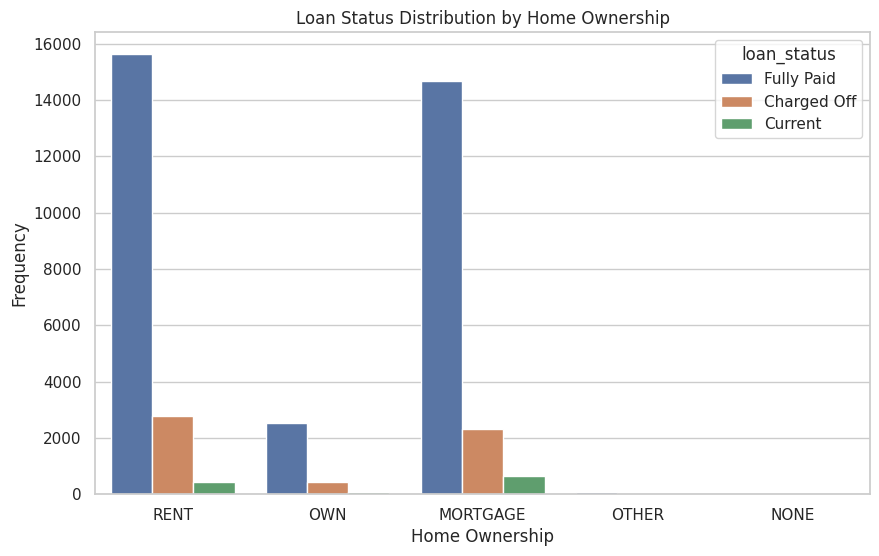

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', data=data_cleaned, hue='loan_status')
plt.title('Loan Status Distribution by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.show()


Interpretation:

1. This count plot visualizes the distribution of loan statuses based on home ownership.

2. It explores if there's a correlation between the type of home ownership and the likelihood of loan default.

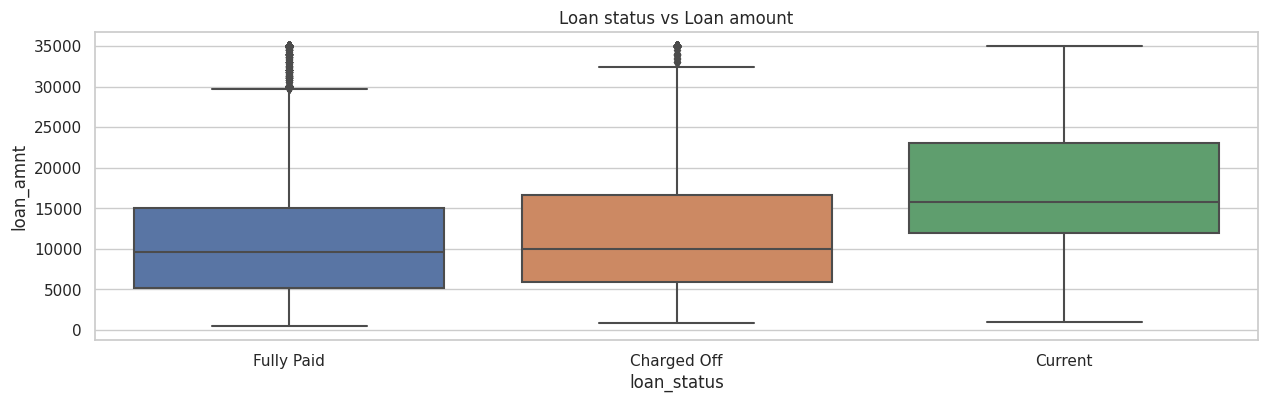

In [ ]:
plt.figure(figsize=(15,4))
sns.boxplot(x="loan_status", y="loan_amnt", data=data_cleaned)
plt.title("Loan status vs Loan amount")
plt.show()

Charged Off has slightly more amount than Fully paid. Therefore the higher the amount the chargeoff risk increases.

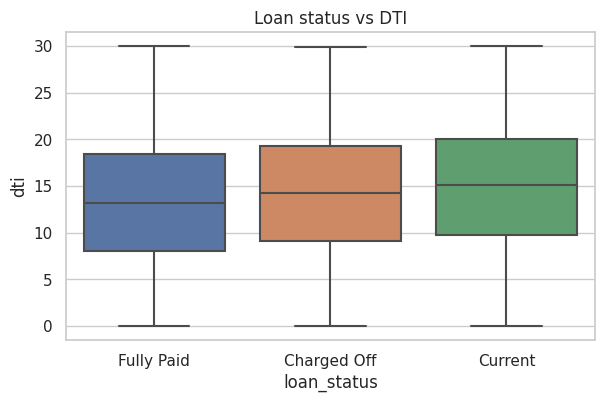

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="dti", data=data)
plt.title("Loan status vs DTI")
plt.show()

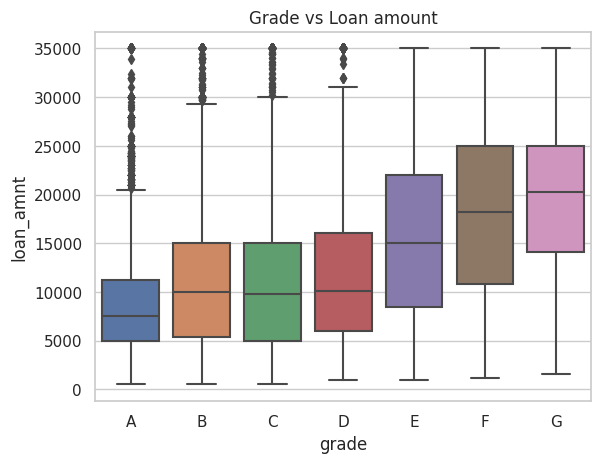

In [ ]:
grade_order = data_cleaned["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="loan_amnt", order= grade_order, data=data_cleaned)
plt.title("Grade vs Loan amount")
plt.show()

Insights-

1. A higher median loan amount for a grade  indicate that borrowers with that grade tend to apply for larger loans.

2. As the grade decreases amount of loan is increasing.

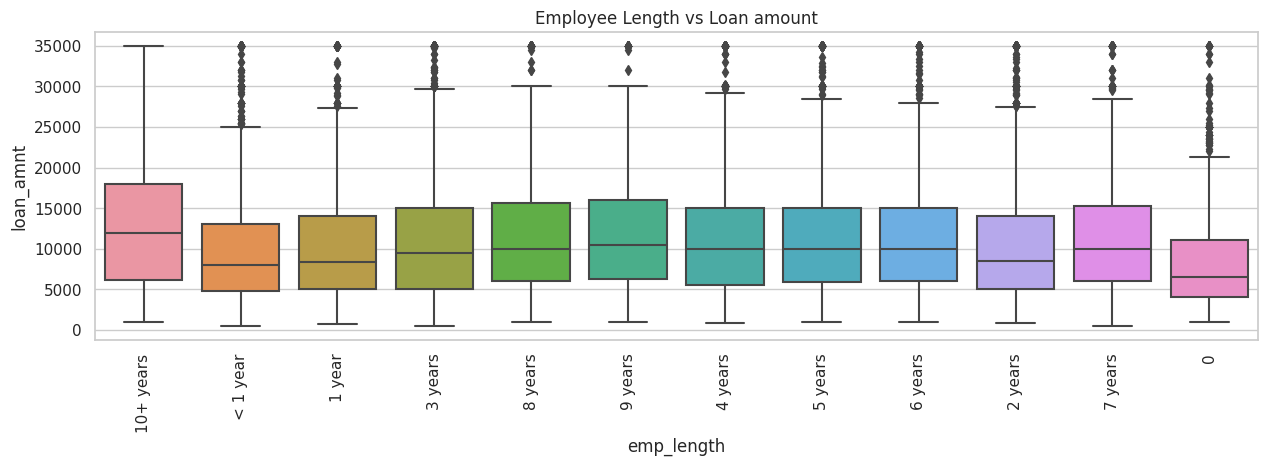

In [ ]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="loan_amnt", data=data_cleaned)
plt.title("Employee Length vs Loan amount")
plt.xticks(rotation=90)
plt.show()

In loan amount vs employee length variable we can say that, the borrower who has 10+ years of experience are taking high amount of loan than others. less than 1 year experice have taken less amount.

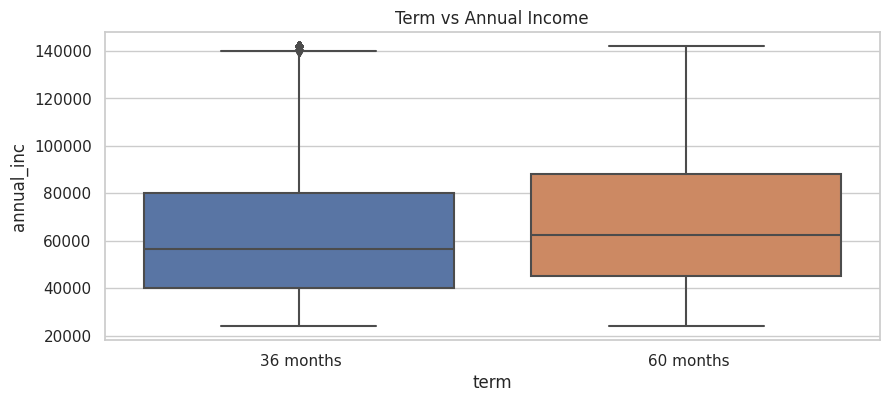

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x="term", y="annual_inc", data=data_cleaned)
plt.title("Term vs Annual Income")
plt.show()

Interpretaion

1. A higher median annual income for a term  suggest that borrowers opting for that term have higher incomes.

2. Borrowers who have high annual income are taking loans for 60 months tenure as compared to 36 months.

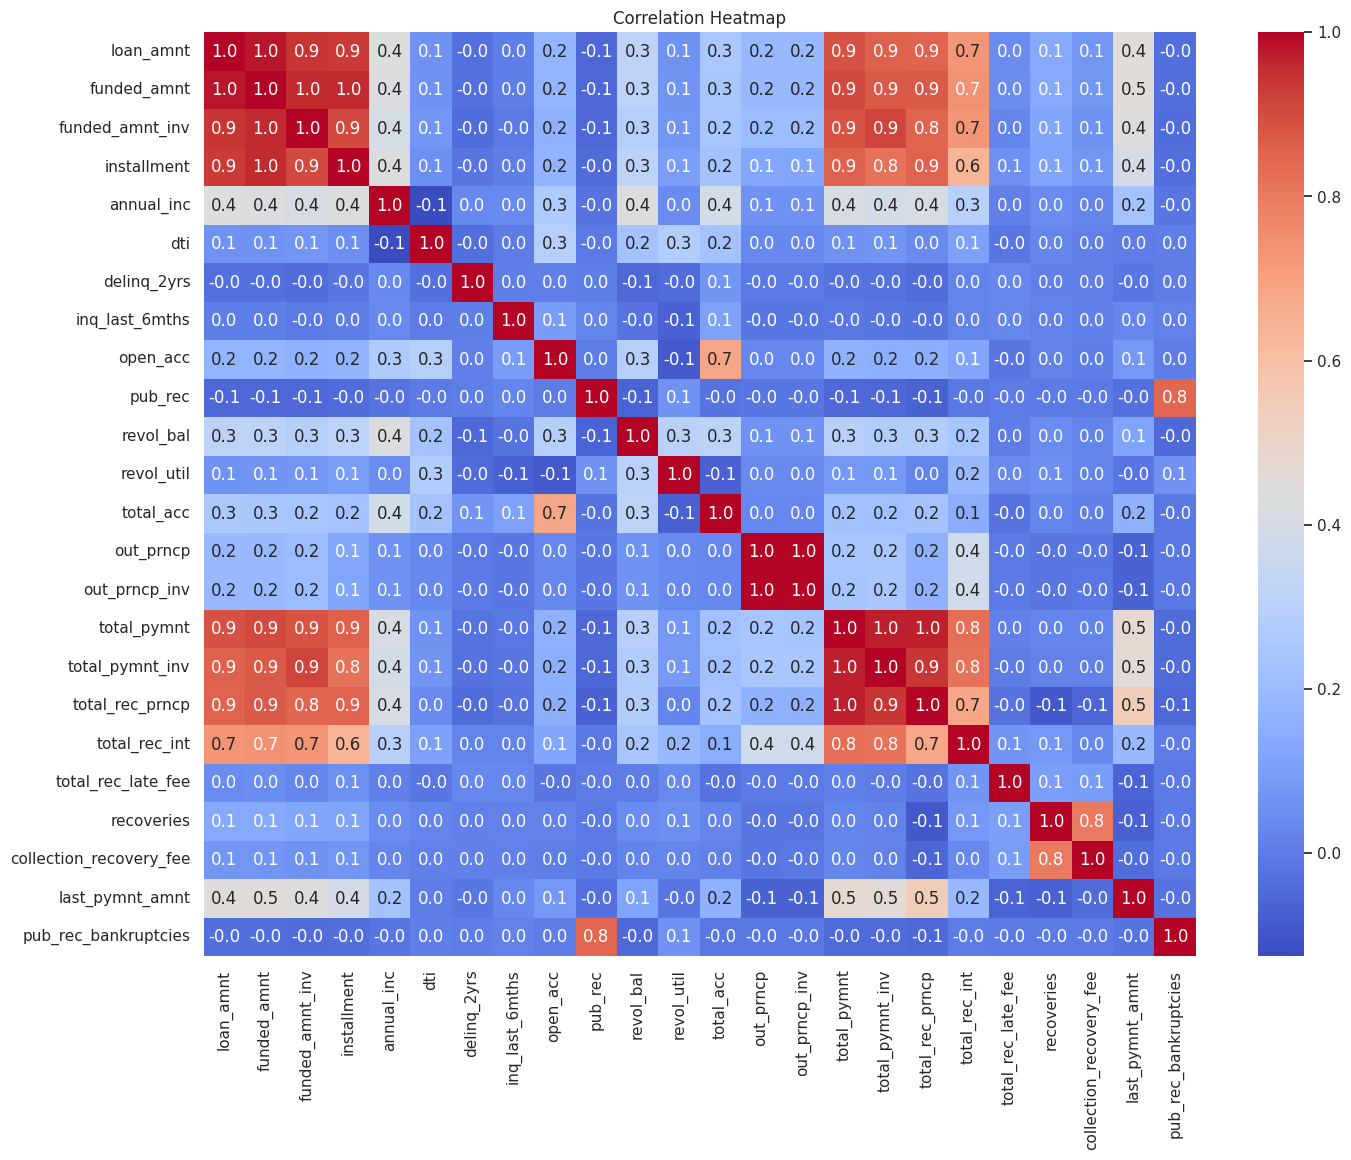

In [ ]:
# Calculate the correlation matrix
corr_matrix = data_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()


Observation

1. This heatmap visualizes the correlation between numerical variables in the dataset.

2. Positive values indicate a positive correlation, while negative values indicate a negative correlation.

3. loan_amnt , funded_amnt , funded_amnt_inv , installment are highly correlated

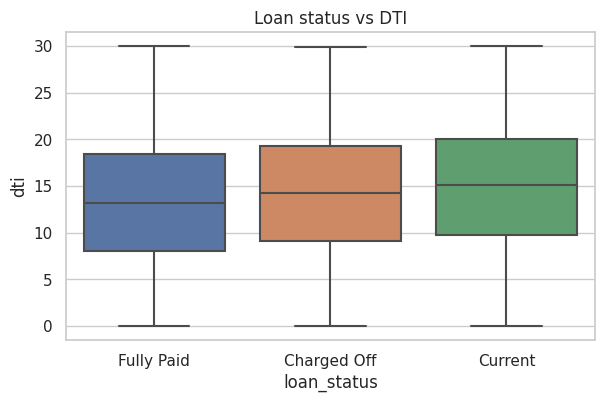

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="dti", data=data)
plt.title("Loan status vs DTI")
plt.show()

Borrowers having high Debt to income ratio are more likely to charge off.

### CONCLUSION --

In conclusion, the exploratory data analysis revealed insights into factors influencing loan default in a consumer finance company. Key drivers, such as annual income, purpose of the loan, and loan amount, were identified. Understanding these factors is crucial for risk assessment and informed decision-making in the lending industry.